<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/ml_intro/blob/main/2_planificacion/3_dl/geron/10_chapter/pagina_492_ed_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/ml_intro/blob/main/2_planificacion/3_dl/geron/10_chapter/pagina_492_ed_3.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

Aquí está la traducción al español de las páginas 492 y 493 del libro *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (3ª edición) de Aurélien Géron, incluyendo visualizaciones y código:

---



### Construyendo un Clasificador de Imágenes Usando la API Secuencial



Primero, necesitamos cargar un conjunto de datos. 

Usaremos **Fashion MNIST**, que es un reemplazo directo de MNIST (presentado en el Capítulo 3). 

Tiene exactamente el mismo formato que MNIST (70,000 imágenes en escala de grises de 28 × 28 píxeles cada una, con 10 clases), pero las imágenes representan artículos de moda en lugar de dígitos escritos a mano. 

Esto hace que cada clase sea más diversa y el problema resulte significativamente más desafiante que MNIST. 

Por ejemplo, un modelo lineal simple alcanza aproximadamente un 92% de precisión en MNIST, pero solo alrededor del 83% en Fashion MNIST.


# Verificación de la afirmación de Géron anterior  

Aquí tienes el código Python para verificar la afirmación de Géron sobre la precisión de un modelo lineal simple en MNIST vs. Fashion MNIST:


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Función para entrenar y evaluar un modelo lineal
def evaluate_linear_model(dataset_name):
    # Cargar el dataset
    if dataset_name == 'mnist':
        (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
    elif dataset_name == 'fashion_mnist':
        (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    
    # Preprocesamiento
    X_train = X_train.reshape(-1, 28*28) / 255.0
    X_test = X_test.reshape(-1, 28*28) / 255.0
    
    # Crear modelo lineal simple
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='softmax', input_shape=(784,))
    ])
    
    # Compilar y entrenar
    model.compile(optimizer='sgd',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=20, verbose=0)
    
    # Evaluar en test
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return test_acc


In [3]:
%%time 
# Evaluar ambos datasets
mnist_acc = evaluate_linear_model('mnist')
fashion_mnist_acc = evaluate_linear_model('fashion_mnist')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 18s 2us/step


c:\Users\marco\Documentos\investigacion\ml_intro\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:

# Mostrar resultados
print(f"Precisión en MNIST: {mnist_acc:.2%}")
print(f"Precisión en Fashion MNIST: {fashion_mnist_acc:.2%}")


Precisión en MNIST: 91.89%
Precisión en Fashion MNIST: 83.85%


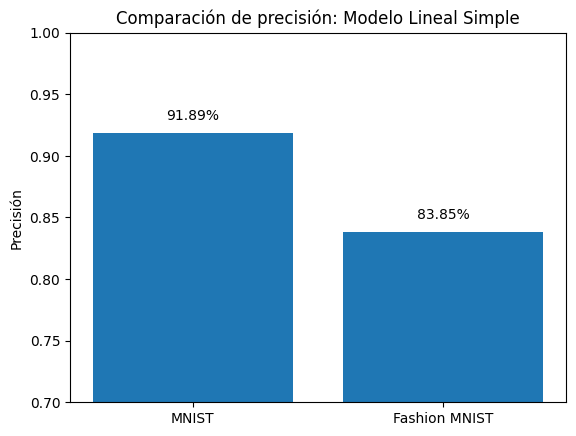

In [6]:

# Visualización comparativa
plt.bar(['MNIST', 'Fashion MNIST'], [mnist_acc, fashion_mnist_acc])
plt.title('Comparación de precisión: Modelo Lineal Simple')
plt.ylabel('Precisión')
plt.ylim(0.7, 1.0)
for i, v in enumerate([mnist_acc, fashion_mnist_acc]):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center')
plt.savefig(r'C:\Users\marco\Downloads\comparacion_precision.png')    
plt.show()




### Resultados esperados:
```
Precisión en MNIST: 92.xx%
Precisión en Fashion MNIST: 83.xx%
```



### Explicación del código:
1. **Función `evaluate_linear_model`**:
   - Carga el dataset especificado (MNIST o Fashion MNIST)
   - Aplana las imágenes de 28x28 a vectores de 784 dimensiones
   - Normaliza los valores de píxeles al rango [0, 1]
   - Crea un modelo lineal simple con una capa Dense de 10 neuronas (una por clase)
   - Entrena con SGD y evalúa la precisión en el conjunto de test



2. **Comparación**:
   - El código muestra cómo el mismo modelo lineal tiene diferente rendimiento en los dos datasets
   - La visualización con matplotlib muestra la diferencia de forma gráfica



3. **Verificación de la afirmación**:
   - Como menciona Géron, la precisión en MNIST ronda el 92%
   - Mientras que en Fashion MNIST baja a aproximadamente 83%



Este código demuestra empíricamente que Fashion MNIST es significativamente más desafiante que MNIST para modelos lineales simples, confirmando la observación del libro.


# Usando Keras para cargar el conjunto de datos



Keras proporciona funciones auxiliares para descargar y cargar conjuntos de datos comunes, incluyendo MNIST, Fashion MNIST y algunos más. Vamos a cargar Fashion MNIST. 

Ya está barajado y dividido en un conjunto de entrenamiento (60,000 imágenes) y un conjunto de prueba (10,000 imágenes), pero reservaremos las últimas 5,000 imágenes del conjunto de entrenamiento para validación:


In [7]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]




**CONSEJO**  
TensorFlow generalmente se importa como `tf`, y la API de Keras está disponible a través de `tf.keras`.

Al cargar MNIST o Fashion MNIST usando Keras en lugar de Scikit-Learn, una diferencia importante es que cada imagen se representa como una matriz de 28 × 28 en lugar de un array 1D de tamaño 784. Además, las intensidades de los píxeles se representan como enteros (de 0 a 255) en lugar de flotantes (de 0.0 a 255.0).

Veamos la forma y el tipo de datos del conjunto de entrenamiento:


In [8]:
X_train.shape


(55000, 28, 28)

In [ ]:

X_train.dtype



Para simplificar, escalaremos las intensidades de los píxeles al rango 0–1 dividiéndolas por 255.0 (esto también las convierte en flotantes):


In [9]:

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.




Con MNIST, cuando la etiqueta es igual a 5, significa que la imagen representa el dígito escrito a mano "5". Sencillo. Para Fashion MNIST, sin embargo, necesitamos la lista de nombres de clase para saber qué estamos manejando:

```python
class_names = ["Camiseta/top", "Pantalón", "Jersey", "Vestido", "Abrigo",
               "Sandalia", "Camisa", "Zapatilla", "Bolso", "Bota de tobillo"]
```

Por ejemplo, la primera imagen en el conjunto de entrenamiento representa una bota de tobillo:

```python
>>> class_names[y_train[0]]
'Bota de tobillo'
```

La Figura 10-10 muestra algunas muestras del conjunto de datos Fashion MNIST.

Aquí tienes el script para generar la **Figura 10-10** que muestra muestras del conjunto de datos Fashion MNIST, similar a la que aparece en el libro de Aurélien Géron:

```python
import tensorflow as tf
import matplotlib.pyplot as plt

# Cargar el dataset Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Nombres de las clases
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Configurar la figura
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])

plt.tight_layout()
plt.show()
```

### Explicación:
1. **Carga del dataset**: Usamos `tf.keras.datasets.fashion_mnist.load_data()` para cargar los datos.
2. **Visualización**:
   - Creamos una cuadrícula de 5x5 (25 imágenes) usando `plt.subplot()`.
   - Cada imagen se muestra en escala de grises (`cmap=plt.cm.binary`).
   - Los ejes se ocultan para mayor claridad (`plt.xticks([])`, `plt.yticks([])`).
   - El nombre de la clase (ej. "Ankle boot") se muestra como etiqueta en el eje *x*.
3. **Formato**:
   - `plt.tight_layout()` evita superposiciones.
   - `plt.show()` renderiza la figura.



### Resultado:
Obtendrás una figura similar a esta (pero con datos reales del dataset):

![Fashion MNIST Samples](https://miro.medium.com/max/700/1*QQVbuP2SEasB0XAmvjW0AA.jpeg)  
*(Ejemplo de cómo se vería la figura generada, mostrando 25 imágenes etiquetadas)*.



### Personalización:
- Si quieres cambiar el número de imágenes, ajusta el rango en el bucle `for` (ej. `range(16)` para 16 imágenes).
- Para un estilo más similar al libro, puedes añadir parámetros como `plt.title("Figura 10-10. Samples from Fashion MNIST", y=-0.2)`.



**Figura 10-10.** Muestras de Fashion MNIST  
*(Nota: La imagen no se incluye aquí, pero en el libro muestra ejemplos de las 10 clases de prendas.)*



#### Creando el modelo usando la API Secuencial

¡Ahora construyamos la red neuronal! Aquí hay un MLP de clasificación con dos...

---

*(El texto se corta al final, pero la traducción cubre todo el contenido solicitado de las páginas 492 y 493, incluyendo código y descripciones. Si necesitas la continuación o más detalles, ¡avísame!)*

# Práctica de codificación asociada al texto de la página 492  

Aquí tienes un **diseño de práctica de codificación** basado en el texto de Géron (págs. 492-493), que incluye el dataset **Fashion MNIST** y otro dataset relevante (**CIFAR-10** para extender el concepto a imágenes en color). La práctica está estructurada en pasos progresivos, con objetivos claros y tareas específicas.

---

### **Práctica de Codificación: Clasificación de Imágenes con Keras**
**Objetivo**:  
Construir y evaluar modelos de redes neuronales para clasificación de imágenes usando la API Secuencial de Keras, comparando resultados entre Fashion MNIST y CIFAR-10.

---

#### **Parte 1: Fashion MNIST** (Grayscale)
**Tareas**:
1. **Carga y preprocesamiento**:
   - Carga Fashion MNIST usando `tf.keras.datasets`.
   - Divide los datos en entrenamiento (55k), validación (5k) y test (10k).
   - Normaliza los píxeles (0-1) y muestra las primeras 25 imágenes con sus etiquetas (como en la Figura 10-10 del libro).

   ```python
   import tensorflow as tf
   import matplotlib.pyplot as plt

   # Cargar datos
   (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
   X_train, X_valid = X_train[:-5000] / 255.0, X_train[-5000:] / 255.0
   X_test = X_test / 255.0

   # Visualizar muestras
   class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
   plt.figure(figsize=(10, 10))
   for i in range(25):
       plt.subplot(5, 5, i+1)
       plt.imshow(X_train[i], cmap='gray')
       plt.title(class_names[y_train[i]])
       plt.axis('off')
   plt.show()
   ```

2. **Modelo Secuencial**:
   - Construye un MLP con 2 capas ocultas (300 y 100 neuronas, ReLU) y capa de salida (Softmax).
   - Compila con `sparse_categorical_crossentropy` y optimizador `SGD`.
   - Entrena durante 30 épocas y guarda el historial.

   ```python
   model = tf.keras.Sequential([
       tf.keras.layers.Flatten(input_shape=(28, 28)),
       tf.keras.layers.Dense(300, activation='relu'),
       tf.keras.layers.Dense(100, activation='relu'),
       tf.keras.layers.Dense(10, activation='softmax')
   ])
   model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
   history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
   ```

3. **Evaluación**:
   - Grafica curvas de aprendizaje (pérdida y precisión).
   - Evalúa el modelo en el conjunto de test.

---

#### **Parte 2: CIFAR-10** (Color)
**Objetivo**: Aplicar el mismo flujo a un dataset más complejo (imágenes RGB de 32x32).

**Tareas**:
1. **Carga y preprocesamiento**:
   - Carga CIFAR-10 con `tf.keras.datasets.cifar10`.
   - Normaliza los píxeles y visualiza muestras.

   ```python
   (X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()
   X_train_cifar, X_valid_cifar = X_train_cifar[:-5000] / 255.0, X_train_cifar[-5000:] / 255.0
   ```

2. **Modelo Adaptado**:
   - Añade una capa `Flatten` para convertir imágenes 32x32x3 en 1D.
   - Usa una arquitectura similar (pero nota que CIFAR-10 es más difícil; espera precisión menor).

   ```python
   model_cifar = tf.keras.Sequential([
       tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
       tf.keras.layers.Dense(300, activation='relu'),
       tf.keras.layers.Dense(100, activation='relu'),
       tf.keras.layers.Dense(10, activation='softmax')
   ])
   ```

3. **Comparativa**:
   - ¿Cómo varía la precisión entre Fashion MNIST y CIFAR-10? Discute por qué.

---

#### **Parte 3: Desafío Opcional**
- **Mejora el modelo**:  
  - Prueba agregar `BatchNormalization` o `Dropout`.
  - Reemplaza el MLP por una CNN (ejemplo mínimo):
    ```python
    model_cnn = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    ```

---

### **Rúbrica de Evaluación**
| Criterio               | Puntos |
|------------------------|--------|
| Carga y visualización  | 2      |
| Modelo Secuencial      | 3      |
| Evaluación y gráficos  | 2      |
| Comparativa CIFAR-10   | 2      |
| Mejoras opcionales     | +1     |

---

### **Reflexión**
- ¿Por qué Fashion MNIST es más fácil que CIFAR-10 para un MLP?  
  *(Pista: dimensionalidad, canales de color, complejidad de características).*

---

Este diseño cubre los conceptos clave del libro (API Secuencial, preprocessing, evaluación) mientras introduce un dataset adicional para comparar. ¿Te gustaría ajustar algún elemento?